In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astroquery.vizier import Vizier
from astroquery.xmatch import XMatch
import astropy.units as u
plt.rc('font', **{'size':'20'}) # Adjusting default font size
plt.rcParams["figure.figsize"] = (8,8) # Setting default figure size

In [3]:
# Opening the table
catalogue = pd.read_csv('El-Badry2018.tsv',sep=';',header=50,dtype=str)

In [4]:
catalogue

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,BPmag,RPmag,plx,e_plx,chi2AL,Dist,Class,sAU,_RA.icrs,_DE.icrs
0,,deg,deg,,mag,mag,mag,mas,mas,,...,mag,mag,mas,mas,,deg,,AU,deg,deg
1,-------------------,----------------------,-----------------------,-------------,----------,----------,----------,--------------------,------------,-------------------,...,----------,----------,--------------------,-----------,-------------,-----------------------,----,---------------------,---------------,---------------
2,2872017147341819904,354.819429167895464161,33.1171185354875845519,754.796260,16.6221700,18.1604500,15.3951920,5.8843035624576174,64.3632000,2872017143044576896,...,12.5978660,11.4967340,5.8356022669144707,154.176130,721.248960,0.00456278415794366277,MSMS,2814.797453102015425,354.81435654808,+33.11908431904
3,2871944820092678272,355.378910719138616514,32.7820853250936465884,624.530400,10.2959410,10.5601120,9.8988085,4.8993526709089483,107.3047560,2871944820092678144,...,11.1493820,10.4047000,5.0650838695823506,96.634390,481.972500,0.00092922207478283916,MSMS,660.443676281253602,355.37975155383,+32.78262904874
4,2846735178834442368,0.477586484106069076,21.2030451635483494499,256.975770,17.9849640,19.5370270,16.7496380,5.8789254249736098,29.4165820,2846735178834441856,...,17.8634100,15.3409160,5.4157252987902913,42.082910,347.212070,0.00178333608760024428,MSMS,1185.439731843633353,0.47647607816,+21.20137859186
5,2846485039939110272,0.998570177611048604,20.9535746917795897559,203.136380,17.3688030,18.8446540,16.1336080,5.3121016278568005,46.2603800,2846483566765789056,...,8.4478810,7.7558540,5.3438516162456375,94.052826,330.009220,0.00659531283808572569,MSMS,4443.077806990379941,0.99164679158,+20.95373499005
6,2872283740256668416,352.991803878265216099,32.3569901497737859586,543.056760,10.4591010,11.0848790,9.7312460,18.2091291895978173,344.6461500,2872283263515298432,...,15.7912350,13.1853940,18.1607634422659885,321.213930,1503.697800,0.03120965977502503444,MSMS,6186.682684715999130,352.98287359452,+32.32718323091
7,2872384281146232064,353.402252238699588816,32.5710753287558603120,259.950840,13.1384430,13.6344500,12.4914170,5.4670738181417216,264.9173300,2872384074987802112,...,16.5037920,14.6914070,5.4995812549347471,127.281060,507.831820,0.00254618411311605336,MSMS,1666.721699808618041,353.40292660502,+32.56926326695
8,2872379264624690432,353.962063551697383446,33.0293626660495576175,623.235840,17.1059400,18.8192840,15.8145330,7.2332709541732303,60.9873430,2872379264624690304,...,17.1448300,14.5703560,7.1714583541701522,103.944950,861.327450,0.00161725053749871284,MSMS,811.844274400127460,353.96051650847,+33.03009402903
9,2872308792800972160,352.903032033744750606,32.6589715538893443636,543.780150,14.5585310,15.4641790,13.6255910,5.1016431225646821,178.3189500,2872309033319137792,...,12.7612810,11.7093340,5.0632125758269995,142.815230,644.862600,0.03424160922649590461,MSMS,24346.184791099862196,352.86739263717,+32.67525664770


In [5]:
# Deleting the first two rows
catalogue = catalogue.drop([0,1])

In [6]:
# Converting columns to float, except Class and identifications
cols = catalogue.columns.difference(['ID2','ID1','Class'])
catalogue[cols] = catalogue[cols].astype(float)

In [7]:
catalogue

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,BPmag,RPmag,plx,e_plx,chi2AL,Dist,Class,sAU,_RA.icrs,_DE.icrs
2,2872017147341819904,354.819429,33.117119,754.79626,16.622170,18.160450,15.395192,5.884304,64.363200,2872017143044576896,...,12.597866,11.496734,5.835602,154.176130,721.24896,0.004563,MSMS,2814.797453,354.814357,33.119084
3,2871944820092678272,355.378911,32.782085,624.53040,10.295941,10.560112,9.898808,4.899353,107.304756,2871944820092678144,...,11.149382,10.404700,5.065084,96.634390,481.97250,0.000929,MSMS,660.443676,355.379752,32.782629
4,2846735178834442368,0.477586,21.203045,256.97577,17.984964,19.537027,16.749638,5.878925,29.416582,2846735178834441856,...,17.863410,15.340916,5.415725,42.082910,347.21207,0.001783,MSMS,1185.439732,0.476476,21.201379
5,2846485039939110272,0.998570,20.953575,203.13638,17.368803,18.844654,16.133608,5.312102,46.260380,2846483566765789056,...,8.447881,7.755854,5.343852,94.052826,330.00922,0.006595,MSMS,4443.077807,0.991647,20.953735
6,2872283740256668416,352.991804,32.356990,543.05676,10.459101,11.084879,9.731246,18.209129,344.646150,2872283263515298432,...,15.791235,13.185394,18.160763,321.213930,1503.69780,0.031210,MSMS,6186.682685,352.982874,32.327183
7,2872384281146232064,353.402252,32.571075,259.95084,13.138443,13.634450,12.491417,5.467074,264.917330,2872384074987802112,...,16.503792,14.691407,5.499581,127.281060,507.83182,0.002546,MSMS,1666.721700,353.402927,32.569263
8,2872379264624690432,353.962064,33.029363,623.23584,17.105940,18.819284,15.814533,7.233271,60.987343,2872379264624690304,...,17.144830,14.570356,7.171458,103.944950,861.32745,0.001617,MSMS,811.844274,353.960517,33.030094
9,2872308792800972160,352.903032,32.658972,543.78015,14.558531,15.464179,13.625591,5.101643,178.318950,2872309033319137792,...,12.761281,11.709334,5.063213,142.815230,644.86260,0.034242,MSMS,24346.184791,352.867393,32.675257
10,2872313706243670400,353.762626,32.214694,1247.21780,14.433413,15.643467,13.340856,9.286380,179.762310,2872313706243670656,...,14.277846,12.355395,9.257277,304.366000,715.89453,0.003612,MSMS,1404.809615,353.763322,32.211303
11,2872630399952398720,353.429962,33.276544,1461.27950,14.604014,16.195232,13.376178,19.660132,295.287960,2872630399952398848,...,16.128939,13.291906,19.579201,289.587200,1756.41210,0.004009,MSMS,737.185184,353.434661,33.278632


In [8]:
# Calculating absolute G magnitudes
Gmag2_abs = catalogue.Gmag2 + 5 - 5*np.log10(1000/catalogue.plx2)
Gmag1_abs = catalogue.Gmag + 5 - 5*np.log10(1000/catalogue.plx)

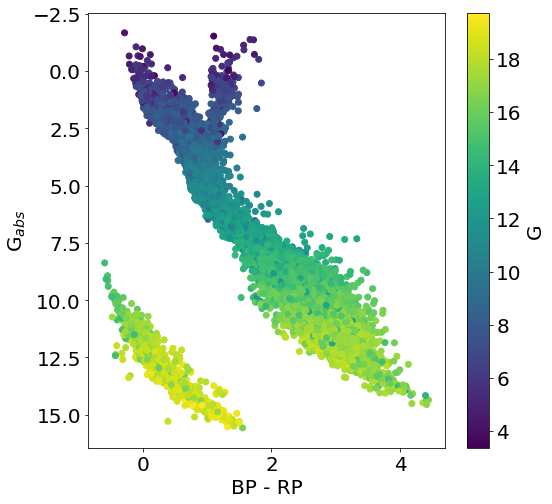

In [9]:
# Color-Magnitude diagram - Component 1
plt.scatter(catalogue.BPmag-catalogue.RPmag,Gmag1_abs,c=catalogue.Gmag,cmap='viridis')
plt.gca().invert_yaxis()
plt.colorbar(label='G')
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.show()

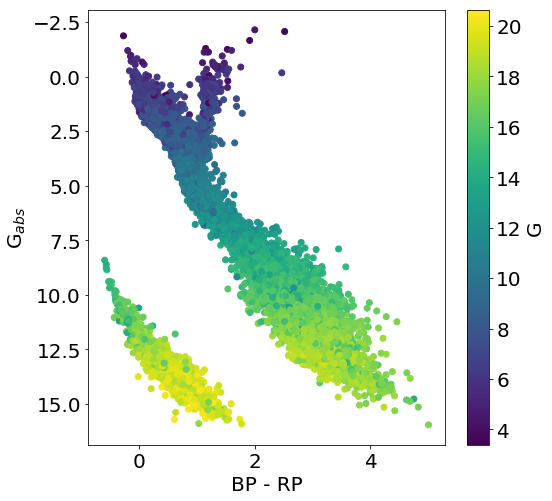

In [10]:
# Color-Magnitude diagram - Component 2
plt.scatter(catalogue.BPmag2-catalogue.RPmag2,Gmag2_abs,c=catalogue.Gmag2,cmap='viridis')
plt.colorbar(label='G')
plt.gca().invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.show()

In [11]:
# Filters the catalogue for interesting targets based on specific criteria.
mask_targets = ((catalogue['Class'] == 'MSMS') # Class 'MSMS' = Main Sequence + Main Sequence
                & (catalogue['Dist']*3600 > 20) # Distance converted to arcseconds greater than 20
                & (catalogue['Gmag'] < 10) & (catalogue['Gmag2'] < 10) # Apparent magnitude G less than 10
                & (catalogue['DE2deg'] > -75) & (catalogue['DE2deg'] < 30)) # Declination less than 30 and greater than -75 degrees

# Apply the mask to filter the catalogue
catalogue_targets = catalogue[mask_targets]

# Filter the corresponding absolute magnitudes
Gmag1_abs_targets = Gmag1_abs[mask_targets]
Gmag2_abs_targets = Gmag2_abs[mask_targets]

catalogue_targets

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,BPmag,RPmag,plx,e_plx,chi2AL,Dist,Class,sAU,_RA.icrs,_DE.icrs
1311,3116252902173428224,106.521528,3.513455,340.88890,9.635463,9.885749,9.269550,6.049291,150.595230,3116252146259181056,...,9.253230,8.719098,5.937303,119.603410,519.819200,0.009894,MSMS,5999.303644,106.531510,3.513268
1321,3116324881524878208,106.384369,3.838421,203.58144,9.705556,10.090427,9.186803,13.453661,300.830720,3116331104937277952,...,7.984714,7.340451,13.333098,210.164230,354.125300,0.113904,MSMS,30754.643654,106.409685,3.949430
1385,3101923001490347392,103.072860,-5.173728,188.19633,6.217028,6.820063,5.530465,114.296763,2458.657500,3101920046552857728,...,10.347557,8.015388,114.414844,2217.950400,440.549560,0.016341,MSMS,514.163276,103.075032,-5.190053
1447,3129424639157547264,102.551180,5.673495,310.55383,6.696761,6.871874,6.448361,11.273541,218.876650,3129425154553598720,...,9.584122,8.801588,11.279781,185.755230,183.500600,0.034594,MSMS,11040.936885,102.558405,5.707376
1581,3339560999352744960,85.048812,10.252564,264.41876,7.819768,8.040130,7.500826,12.059108,224.752910,3339565461821955712,...,8.755274,8.108447,12.120070,251.395080,291.756700,0.132698,MSMS,39415.022673,84.946551,10.339169
1889,3904895793493364736,183.608214,8.784635,482.82320,9.555347,10.102770,8.900262,19.502961,461.697400,3904895793493364608,...,7.671498,6.912242,19.399726,396.298250,523.340940,0.006467,MSMS,1200.002443,183.613867,8.782392
1917,3898778969789498880,181.072770,7.405548,438.00650,9.697005,9.998848,9.262095,8.832621,78.032540,3898778901070021504,...,9.302570,8.635869,8.583692,97.838360,348.060200,0.007665,MSMS,3214.607382,181.076793,7.399075
2008,3900151160300881536,185.632765,5.305223,419.95130,6.322128,6.624368,5.917728,33.324891,675.414300,3900151916215125760,...,9.649638,8.295198,33.281015,514.770570,163.698670,0.005821,MSMS,629.707887,185.631269,5.310831
2519,4837897414719047936,64.844636,-44.276394,379.23227,8.531971,8.833313,8.111717,13.204799,417.296000,4837896143408729216,...,5.598768,4.358727,13.404953,145.170910,4661.097000,0.019538,MSMS,5247.160064,64.819575,-44.267918
2806,4869641105686903040,63.142360,-36.143501,734.49800,7.838116,8.052843,7.540317,8.032536,305.114650,4869641071327166592,...,7.259678,6.665256,7.936845,371.321700,840.973800,0.013961,MSMS,6332.325963,63.128761,-36.152551


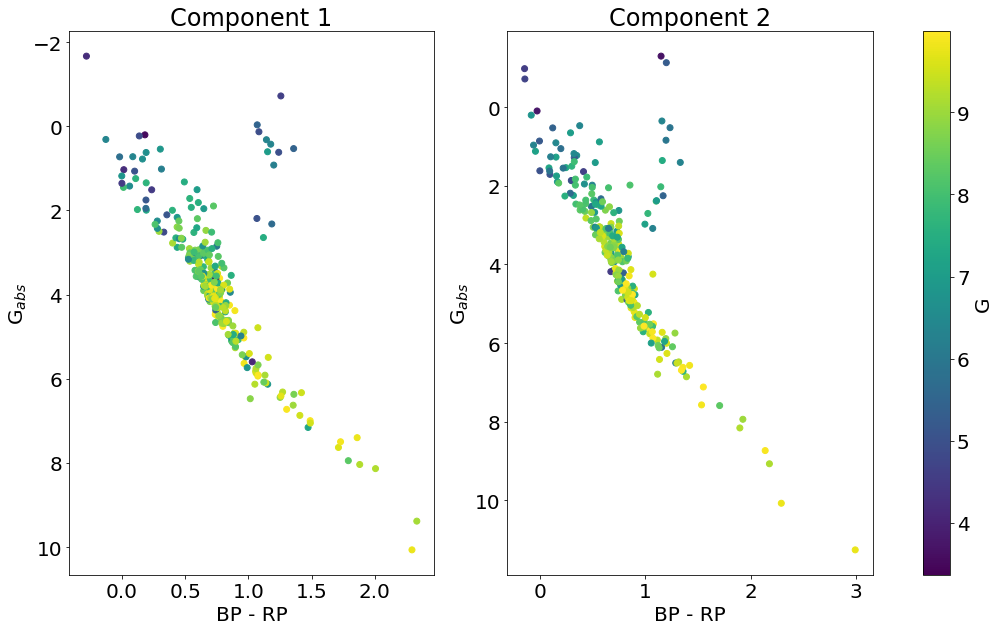

In [12]:
# Plotting Color-Magnitude diagrams for the resulting target catalogue.

# Set up the grid for the subplots
gs = gridspec.GridSpec(1, 2, wspace=0.2)
fig = plt.figure(figsize=(18,10))

# Plot Color-Magnitude diagram for Component 1
ax1 = fig.add_subplot(gs[0, 0])
sc = ax1.scatter(catalogue_targets.BPmag-catalogue_targets.RPmag,Gmag1_abs_targets,c=catalogue_targets.Gmag,
                 vmin=min(min(catalogue_targets.Gmag),min(catalogue_targets.Gmag2)),
                 vmax=min(max(catalogue_targets.Gmag),max(catalogue_targets.Gmag2)))
ax1.invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.title('Component 1')

# Plot Color-Magnitude diagram for Component 2
ax2 = fig.add_subplot(gs[0, 1])
sc = ax2.scatter(catalogue_targets.BPmag2-catalogue_targets.RPmag2,Gmag2_abs_targets,c=catalogue_targets.Gmag2,
                vmin=min(min(catalogue_targets.Gmag),min(catalogue_targets.Gmag2)),
                vmax=min(max(catalogue_targets.Gmag),max(catalogue_targets.Gmag2)))
ax2.invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.title('Component 2')

# Add a colorbar shared between the subplots
cbar = plt.colorbar(sc,ax=[ax1,ax2])
cbar.set_label('G')

plt.show()

In [13]:
# Saving the filtered target catalogue to a CSV file.
catalogue_targets.to_csv('catalogue_targets.csv')

In [14]:
# Matching the local target catalogue with Gaia DR3 (online) using component 2.
table = XMatch.query(cat1=open('catalogue_targets.csv'),
                    cat2='vizier:I/355/gaiadr3',
                    max_distance=5*u.arcsec, # Maximum distance for cross-matching
                    colRA1='RA2deg', # Column name for RA in the local catalogue
                    colDec1='DE2deg') # Column name for Dec in the local catalogue

In [15]:
# Convert the Astropy Table to a pandas DataFrame
table = table.to_pandas()

# Sort the DataFrame by angular distance to prioritize closest matches
table = table.sort_values('angDist') 

# Remove duplicate entries based on the specified column, keeping the first occurrence
table = table.drop_duplicates(subset='col1',keep='first')

# Sort the DataFrame by the unique column for better organization
table = table.sort_values('col1') 

In [16]:
# List of column names to be kept in the resulting DataFrame - not all!
tokeep = ['Teff','b_Teff','B_Teff','logg','b_logg','B_logg','[Fe/H]','b_[Fe/H]','B_[Fe/H]','Dist_2','b_Dist','B_Dist','RUWE']

# Resulting Dataframe:
table2 = table[tokeep]

In [17]:
# Renames the columns of the DataFrame by appending the suffix '_2' - component 2
table2.columns = [str(col) + '_2' for col in table2.columns]

In [18]:
# Adding the component 2 parameters to the final catalogue by joining the two DataFrames
final_table = catalogue_targets.join(table2.set_index(catalogue_targets.index))

In [19]:
# Matching the local target catalogue with Gaia DR3 (online) using component 1.
table = XMatch.query(cat1=open('catalogue_targets.csv'),
                    cat2='vizier:I/355/gaiadr3',
                    max_distance=5*u.arcsec, # Maximum distance for cross-matching
                    colRA1='RA_ICRS', # Column name for RA in the local catalogue
                    colDec1='DE_ICRS') # Column name for Dec in the local catalogue

In [20]:
# Convert the Astropy Table to a pandas DataFrame
table = table.to_pandas()

# Sort the DataFrame by angular distance to prioritize closest matches
table = table.sort_values('angDist') 

# Remove duplicate entries based on the specified column, keeping the first occurrence
table = table.drop_duplicates(subset='col1',keep='first')

# Sort the DataFrame by the unique column for better organization
table = table.sort_values('col1') 

In [21]:
# List of column names to be kept in the resulting DataFrame - not all!
tokeep = ['Teff','b_Teff','B_Teff','logg','b_logg','B_logg','[Fe/H]','b_[Fe/H]','B_[Fe/H]','Dist_2','b_Dist','B_Dist','RUWE']

# Resulting Dataframe
table2 = table[tokeep]

In [22]:
# Renames the columns of the DataFrame by appending the suffix '_1' - component 1
table2.columns = [str(col) + '_1' for col in table2.columns]

In [23]:
# Adding the component 1 parameters to the final catalogue by joining the two DataFrames
final_table = final_table.join(table2.set_index(catalogue_targets.index))

In [24]:
final_table

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,logg_1,b_logg_1,B_logg_1,[Fe/H]_1,b_[Fe/H]_1,B_[Fe/H]_1,Dist_2_1,b_Dist_1,B_Dist_1,RUWE_1
1311,3116252902173428224,106.521528,3.513455,340.88890,9.635463,9.885749,9.269550,6.049291,150.595230,3116252146259181056,...,4.1330,4.1291,4.1380,-0.1447,-0.1590,-0.1285,164.7009,164.0677,165.3512,1.200
1321,3116324881524878208,106.384369,3.838421,203.58144,9.705556,10.090427,9.186803,13.453661,300.830720,3116331104937277952,...,4.1152,4.1138,4.1164,-0.9019,-0.9139,-0.8889,73.8001,73.6575,73.9491,1.062
1385,3101923001490347392,103.072860,-5.173728,188.19633,6.217028,6.820063,5.530465,114.296763,2458.657500,3101920046552857728,...,4.3432,4.1617,4.5860,-0.6115,-0.8245,-0.3374,8.7448,8.7143,8.7663,1.151
1447,3129424639157547264,102.551180,5.673495,310.55383,6.696761,6.871874,6.448361,11.273541,218.876650,3129425154553598720,...,4.3835,4.3711,4.3972,-0.0911,-0.1127,-0.0664,88.0572,87.9361,88.1895,0.951
1581,3339560999352744960,85.048812,10.252564,264.41876,7.819768,8.040130,7.500826,12.059108,224.752910,3339565461821955712,...,4.2651,4.2634,4.2669,-0.3888,-0.3944,-0.3823,81.7857,81.6417,81.9435,1.048
1889,3904895793493364736,183.608214,8.784635,482.82320,9.555347,10.102770,8.900262,19.502961,461.697400,3904895793493364608,...,4.2388,4.2338,4.2422,0.1915,0.1761,0.2034,50.6089,50.3502,51.0246,1.379
1917,3898778969789498880,181.072770,7.405548,438.00650,9.697005,9.998848,9.262095,8.832621,78.032540,3898778901070021504,...,4.1419,4.1395,4.1441,-0.6892,-0.7018,-0.6785,113.6361,113.3924,113.8920,1.040
2008,3900151160300881536,185.632765,5.305223,419.95130,6.322128,6.624368,5.917728,33.324891,675.414300,3900151916215125760,...,4.5891,4.5871,4.5907,0.2158,0.2063,0.2260,29.9549,29.9089,30.0396,1.069
2519,4837897414719047936,64.844636,-44.276394,379.23227,8.531971,8.833313,8.111717,13.204799,417.296000,4837896143408729216,...,2.5818,2.5718,2.5935,-0.0805,-0.0872,-0.0753,79.8774,78.9107,80.7456,1.129
2806,4869641105686903040,63.142360,-36.143501,734.49800,7.838116,8.052843,7.540317,8.032536,305.114650,4869641071327166592,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999


In [25]:
# Catalogue columns
final_table.columns

Index(['ID2', 'RA2deg', 'DE2deg', 'chi2AL2', 'Gmag2', 'BPmag2', 'RPmag2',
       'plx2', 'e_plx2', 'ID1', 'RA_ICRS', 'DE_ICRS', 'Gmag', 'BPmag', 'RPmag',
       'plx', 'e_plx', 'chi2AL', 'Dist', 'Class', 'sAU', '_RA.icrs',
       '_DE.icrs', 'Teff_2', 'b_Teff_2', 'B_Teff_2', 'logg_2', 'b_logg_2',
       'B_logg_2', '[Fe/H]_2', 'b_[Fe/H]_2', 'B_[Fe/H]_2', 'Dist_2_2',
       'b_Dist_2', 'B_Dist_2', 'RUWE_2', 'Teff_1', 'b_Teff_1', 'B_Teff_1',
       'logg_1', 'b_logg_1', 'B_logg_1', '[Fe/H]_1', 'b_[Fe/H]_1',
       'B_[Fe/H]_1', 'Dist_2_1', 'b_Dist_1', 'B_Dist_1', 'RUWE_1'],
      dtype='object')

In [26]:
# Filters the final table to find the best pairs based on a logg threshold
mask_pairs = (abs(final_table['logg_1']-final_table['logg_2']) > 0.4) # Threshold value

# Filtered DataFrame
final_selection = final_table[mask_pairs]

In [27]:
final_selection

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,logg_1,b_logg_1,B_logg_1,[Fe/H]_1,b_[Fe/H]_1,B_[Fe/H]_1,Dist_2_1,b_Dist_1,B_Dist_1,RUWE_1
1321,3116324881524878208,106.384369,3.838421,203.58144,9.705556,10.090427,9.186803,13.453661,300.830720,3116331104937277952,...,4.1152,4.1138,4.1164,-0.9019,-0.9139,-0.8889,73.8001,73.6575,73.9491,1.062
1447,3129424639157547264,102.551180,5.673495,310.55383,6.696761,6.871874,6.448361,11.273541,218.876650,3129425154553598720,...,4.3835,4.3711,4.3972,-0.0911,-0.1127,-0.0664,88.0572,87.9361,88.1895,0.951
2519,4837897414719047936,64.844636,-44.276394,379.23227,8.531971,8.833313,8.111717,13.204799,417.296000,4837896143408729216,...,2.5818,2.5718,2.5935,-0.0805,-0.0872,-0.0753,79.8774,78.9107,80.7456,1.129
2897,4375738420908692992,264.785629,2.027952,194.08188,5.958270,6.508751,5.311427,9.486956,152.054630,4376114556963824384,...,3.9491,3.9428,3.9521,-0.8645,-0.8789,-0.8435,103.7659,103.3406,104.6733,1.048
3377,3952692457305436800,187.582608,21.948099,293.78310,7.454218,7.980921,6.818715,6.041723,124.524010,3952693281939158144,...,4.2232,4.2209,4.2256,-0.5756,-0.5866,-0.5633,165.6130,164.9762,166.1761,1.265
7556,3053492881541639552,113.029784,-8.884609,382.59976,9.864023,10.597213,9.062839,34.828859,893.129460,3053492881541641600,...,4.0686,4.0669,4.0717,-1.1191,-1.1438,-1.0809,28.6291,28.5766,28.6664,0.966
9967,53896518103817344,61.304927,23.798076,777.90380,9.973414,10.330794,9.483056,9.436661,158.679370,53896621183031552,...,4.0424,4.0402,4.0447,-0.3118,-0.3262,-0.2971,104.7996,104.4779,105.1640,0.985
10070,43335537119008896,55.939232,16.665933,363.48910,9.917213,11.038033,8.900257,58.007039,1269.046800,43335880716390784,...,4.0190,4.0182,4.0248,-1.4340,-1.4351,-1.4259,17.2021,17.1914,17.2191,1.036
10614,2908912737481891968,85.323003,-26.353155,495.66083,9.183044,9.506899,8.729838,13.849119,462.894200,2908912737481891328,...,4.0178,3.9962,4.0651,-1.2073,-1.5273,-1.1135,72.8626,66.5192,75.6877,8.300
11774,4822499299831074560,80.577029,-35.297483,889.35100,8.380597,8.540274,7.962350,8.995345,182.263020,4822499677788196224,...,4.4438,4.4342,4.4492,-0.2356,-0.2796,-0.2162,110.3983,110.2048,110.6749,0.986


In [28]:
# Calculating the absolute G magnitudes for component 1 and component 2
Gmag2_abs = final_selection.Gmag2 + 5 - 5*np.log10(1000/final_selection.plx2)
Gmag1_abs = final_selection.Gmag + 5 - 5*np.log10(1000/final_selection.plx)

# Adding calculated absolute G magnitudes to the final selection DataFrame.
final_selection = final_selection.assign(Gmag2_abs=pd.Series(Gmag2_abs).values)
final_selection = final_selection.assign(Gmag1_abs=pd.Series(Gmag1_abs).values)

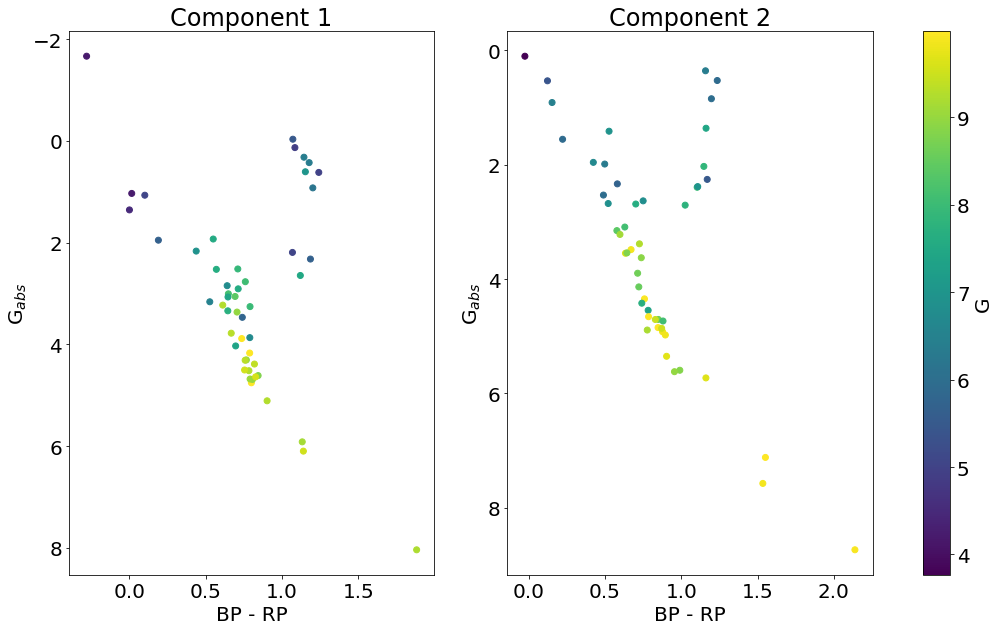

In [29]:
# Plotting Color-Magnitude diagrams for the final selection.

# Set up the grid for the subplots
gs = gridspec.GridSpec(1, 2, wspace=0.2)
fig = plt.figure(figsize=(18,10))

# Plot Color-Magnitude diagram for Component 1
ax1 = fig.add_subplot(gs[0, 0])
sc = ax1.scatter(final_selection.BPmag-final_selection.RPmag,final_selection.Gmag1_abs,c=final_selection.Gmag,
                 vmin=min(min(final_selection.Gmag),min(final_selection.Gmag2)),
                 vmax=min(max(final_selection.Gmag),max(final_selection.Gmag2)))
ax1.invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.title('Component 1')

# Plot Color-Magnitude diagram for Component 2
ax2 = fig.add_subplot(gs[0, 1])
sc = ax2.scatter(final_selection.BPmag2-final_selection.RPmag2,final_selection.Gmag2_abs,c=final_selection.Gmag2,
                vmin=min(min(final_selection.Gmag),min(final_selection.Gmag2)),
                vmax=min(max(final_selection.Gmag),max(final_selection.Gmag2)))
ax2.invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel('G$_{abs}$')
plt.title('Component 2')

# Add a colorbar shared between the subplots
cbar = plt.colorbar(sc,ax=[ax1,ax2])
cbar.set_label('G')

plt.show()

In [30]:
# Calculating the V magnitude based on G magnitude and BP-RP color, following the Gaia photometric relationships
def V(G,BP_RP):
    dif = BP_RP
    return(G+0.01760 + 0.006860*dif + 0.1732*dif**2)

# Calculating V magnitudes
V2 = V(final_selection.Gmag2,final_selection.BPmag2-final_selection.RPmag2)
V1 = V(final_selection.Gmag,final_selection.BPmag-final_selection.RPmag)

# Adding V magnitudes to the DataFrame
final_selection = final_selection.assign(V2=pd.Series(V2).values)
final_selection = final_selection.assign(V1=pd.Series(V1).values)

In [31]:
# Calculating absolute V magnitudes
V2_abs = final_selection.V2 + 5 - 5*np.log10(1000/final_selection.plx2)
V1_abs = final_selection.V1 + 5 - 5*np.log10(1000/final_selection.plx)

# Adding absolute V magnitudes to the DataFrame
final_selection = final_selection.assign(V2_abs=pd.Series(V2_abs).values)
final_selection = final_selection.assign(V1_abs=pd.Series(V1_abs).values)

In [32]:
# Calculating the bolometric correction using the Torres et al. (2010) relation.

def bc_torres(teff):
    if np.log10(teff) < 3.70:
        a = -0.190537291496456*10**5
        b = 0.155144866764412*10**5
        c = -0.421278819301717*10**4
        d = 0.381476328422343*10**3
        e = 0
        f = 0
        
    elif (np.log10(teff) > 3.70) and (np.log10(teff) < 3.90):
        a = -0.370510203809015*10**5
        b =  0.385672629965804*10**5
        c = -0.150651486316025*10**5
        d =  0.261724637119416*10**4
        e = -0.170623810323864*10**3
        f = 0
        
    elif np.log10(teff) > 3.90:
        a = -0.118115450538963*10**6
        b = 0.137145973583929*10**6
        c = -0.636233812100225*10**5
        d = 0.147412923562646*10**5
        e = -0.170587278406872*10**4
        f = 0.788731721804990*10**2
    
    bc = a + b*(np.log10(teff)) + c*(np.log10(teff)**2) + d*(np.log10(teff)**3) + e*(np.log10(teff)**4) + f*(np.log10(teff)**5)
    return bc

# Calculating the bolometric correction
BC1 = np.array([bc_torres(teff) for teff in final_selection.Teff_1])
BC2 = np.array([bc_torres(teff) for teff in final_selection.Teff_2])

# Adding bolometric corrections to the DataFrame
final_selection = final_selection.assign(BC2=pd.Series(BC2).values)
final_selection = final_selection.assign(BC1=pd.Series(BC1).values)

In [33]:
# Calculating the bolometric magnitudes
mbol1 = final_selection.V1_abs + final_selection.BC1
mbol2 = final_selection.V2_abs + final_selection.BC2

# Adding to the DataFrame
final_selection = final_selection.assign(mbol2=pd.Series(mbol2).values)
final_selection = final_selection.assign(mbol1=pd.Series(mbol1).values)

In [34]:
# Calculating stellar luminosities
lum1 = 10**(0.4*(4.73-mbol1))
lum2 = 10**(0.4*(4.73-mbol2))

# Adding to the DataFrame
final_selection = final_selection.assign(lum2=pd.Series(lum2).values)
final_selection = final_selection.assign(lum1=pd.Series(lum1).values)

In [35]:
final_selection

,ID2,RA2deg,DE2deg,chi2AL2,Gmag2,BPmag2,RPmag2,plx2,e_plx2,ID1,...,V2,V1,V2_abs,V1_abs,BC2,BC1,mbol2,mbol1,lum2,lum1
1321,3116324881524878208,106.384369,3.838421,203.58144,9.705556,10.090427,9.186803,13.453661,300.830720,3116331104937277952,...,9.870779,7.808183,5.514981,3.432838,-0.113421,-0.014602,5.401560,3.418236,0.538736,3.347385
1447,3129424639157547264,102.551180,5.673495,310.55383,6.696761,6.871874,6.448361,11.273541,218.876650,3129425154553598720,...,6.748332,9.383393,2.008634,4.644896,0.033014,-0.063917,2.041648,4.580979,11.894351,1.147118
2519,4837897414719047936,64.844636,-44.276394,379.23227,8.531971,8.833313,8.111717,13.204799,417.296000,4837896143408729216,...,8.644707,5.275168,4.248365,0.911495,-0.044818,-0.362007,4.203547,0.549487,1.623981,47.011599
2897,4375738420908692992,264.785629,2.027952,194.08188,5.958270,6.508751,5.311427,9.486956,152.054630,4376114556963824384,...,6.232380,7.696988,1.118015,2.601405,-0.162093,0.022621,0.955922,2.624026,32.331906,6.956482
3377,3952692457305436800,187.582608,21.948099,293.78310,7.454218,7.980921,6.818715,6.041723,124.524010,3952693281939158144,...,7.713736,10.114074,1.619540,4.000252,-0.389445,-0.051833,1.230095,3.948420,25.116676,2.054150
7556,3053492881541639552,113.029784,-8.884609,382.59976,9.864023,10.597213,9.062839,34.828859,893.129460,3053492881541641600,...,10.299914,5.876783,8.009610,3.584303,-0.984581,-0.061880,7.025029,3.522424,0.120778,3.041099
9967,53896518103817344,61.304927,23.798076,777.90380,9.973414,10.330794,9.483056,9.436661,158.679370,53896621183031552,...,10.121301,8.217517,4.995393,3.099590,-0.084860,-0.022644,4.910533,3.076946,0.846811,4.583755
10070,43335537119008896,55.939232,16.665933,363.48910,9.917213,11.038033,8.900257,58.007039,1269.046800,43335880716390784,...,10.741017,9.857556,9.558421,8.678800,-2.111628,-1.902606,7.446792,6.776195,0.081900,0.151888
10614,2908912737481891968,85.323003,-26.353155,495.66083,9.183044,9.506899,8.729838,13.849119,462.894200,2908912737481891328,...,9.310556,7.505725,5.017667,3.161342,-0.068829,-0.014250,4.948838,3.147092,0.817456,4.296979
11774,4822499299831074560,80.577029,-35.297483,889.35100,8.380597,8.540274,7.962350,8.995345,182.263020,4822499677788196224,...,8.460010,10.116927,3.230099,4.886991,0.009442,-0.075350,3.239540,4.811641,3.946243,0.927563


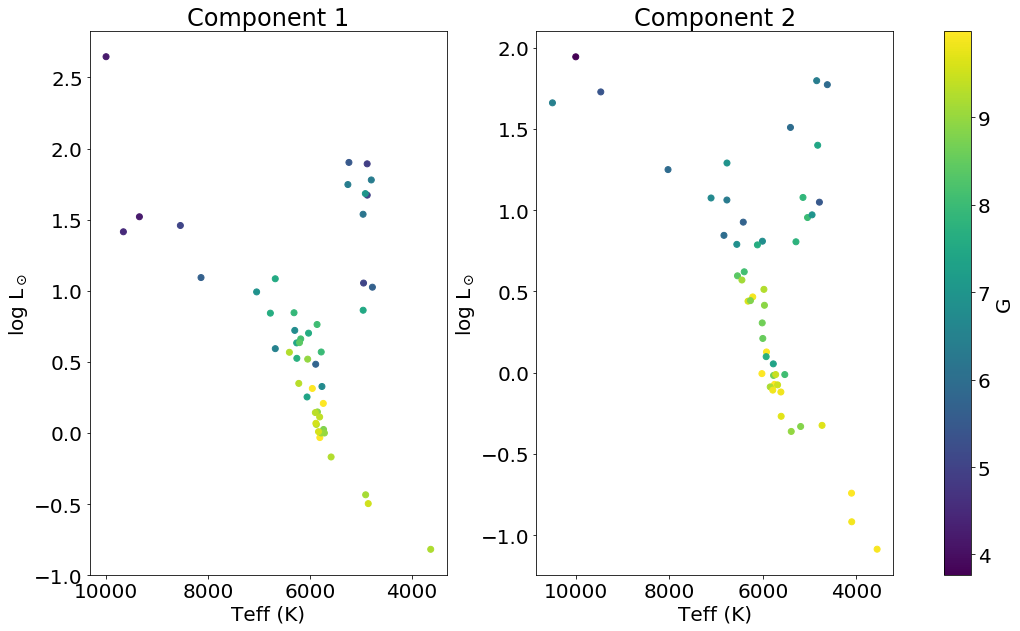

In [36]:
# Plotting HR diagrams for the final selection.

# Set up the grid for the subplots
gs = gridspec.GridSpec(1, 2, wspace=0.25)
fig = plt.figure(figsize=(18,10))

# Plot HR diagram for Component 1
ax1 = fig.add_subplot(gs[0, 0])
sc = ax1.scatter(final_selection.Teff_1,np.log10(final_selection.lum1),c=final_selection.Gmag,
                 vmin=min(min(final_selection.Gmag),min(final_selection.Gmag2)),
                 vmax=min(max(final_selection.Gmag),max(final_selection.Gmag2)))
ax1.invert_xaxis()
plt.xlabel('Teff (K)')
plt.ylabel('log L$_\odot$')
plt.title('Component 1')

# Plot HR diagram for Component 2
ax2 = fig.add_subplot(gs[0, 1])
sc = ax2.scatter(final_selection.Teff_2,np.log10(final_selection.lum2),c=final_selection.Gmag2,
                vmin=min(min(final_selection.Gmag),min(final_selection.Gmag2)),
                vmax=min(max(final_selection.Gmag),max(final_selection.Gmag2)))
ax2.invert_xaxis()
plt.xlabel('Teff (K)')
plt.ylabel('log L$_\odot$')
plt.title('Component 2')

# Add a colorbar shared between the subplots
cbar = plt.colorbar(sc,ax=[ax1,ax2])
cbar.set_label('G')

plt.show()

In [37]:
# Saving the final selection as a file
final_selection.to_csv('final_selection_bin.csv')